In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/Saipa.csv')
df2 = pd.DataFrame({'year' : [str(x)[0:4] for x in df['<DTYYYYMMDD>']],
                   'month' : [str(x)[4:6] for x in df['<DTYYYYMMDD>']],
                   'day' : [str(x)[6:8] for x in df['<DTYYYYMMDD>']]})
df['date'] = pd.to_datetime(df2)
df.head()

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,date
0,Saipa,20190327,1200.0,1230.0,1155.0,1185.0,176335315273,148797731,8810,D,1175.0,1164.0,2019-03-27
1,Saipa,20190326,1165.0,1181.0,1155.0,1175.0,53776077278,45752698,2496,D,1125.0,1181.0,2019-03-26
2,Saipa,20190325,1104.0,1148.0,1090.0,1125.0,54284964909,48266909,3810,D,1094.0,1148.0,2019-03-25
3,Saipa,20190319,1098.0,1104.0,1088.0,1094.0,51346602848,46915467,2946,D,1093.0,1102.0,2019-03-19
4,Saipa,20190318,1087.0,1107.0,1080.0,1093.0,52023922956,47613958,3342,D,1086.0,1091.0,2019-03-18


In [7]:
df['first'] = df['<FIRST>']
df['high'] = df['<HIGH>']
df['low'] = df['<LOW>']
df['close'] = df['<CLOSE>']
df['value'] = df['<VALUE>']
df['volume'] = df['<VOL>']
df=df[['date' , 'first' , 'high' , 'low' , 'close' , 'value' , 'volume']]
df.head()

,date,first,high,low,close,value,volume
0,2019-03-27,1200.0,1230.0,1155.0,1185.0,176335315273,148797731
1,2019-03-26,1165.0,1181.0,1155.0,1175.0,53776077278,45752698
2,2019-03-25,1104.0,1148.0,1090.0,1125.0,54284964909,48266909
3,2019-03-19,1098.0,1104.0,1088.0,1094.0,51346602848,46915467
4,2019-03-18,1087.0,1107.0,1080.0,1093.0,52023922956,47613958


In [8]:
df.to_csv("simple_saipa.csv")

In [3]:
df = pd.read_csv("simple_saipa.csv")
df.head()

,Unnamed: 0,date,first,high,low,close,value,volume
0,0,2019-03-27,1200.0,1230.0,1155.0,1185.0,176335315273,148797731
1,1,2019-03-26,1165.0,1181.0,1155.0,1175.0,53776077278,45752698
2,2,2019-03-25,1104.0,1148.0,1090.0,1125.0,54284964909,48266909
3,3,2019-03-19,1098.0,1104.0,1088.0,1094.0,51346602848,46915467
4,4,2019-03-18,1087.0,1107.0,1080.0,1093.0,52023922956,47613958


In [4]:
df.set_index('date',inplace=True)
df.head()

,Unnamed: 0,first,high,low,close,value,volume
date,,,,,,,
2019-03-27,0,1200.0,1230.0,1155.0,1185.0,176335315273,148797731
2019-03-26,1,1165.0,1181.0,1155.0,1175.0,53776077278,45752698
2019-03-25,2,1104.0,1148.0,1090.0,1125.0,54284964909,48266909
2019-03-19,3,1098.0,1104.0,1088.0,1094.0,51346602848,46915467
2019-03-18,4,1087.0,1107.0,1080.0,1093.0,52023922956,47613958


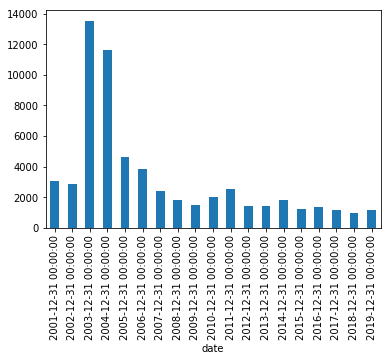

In [30]:
df['volume'].resample('Y').mean().plot.bar()

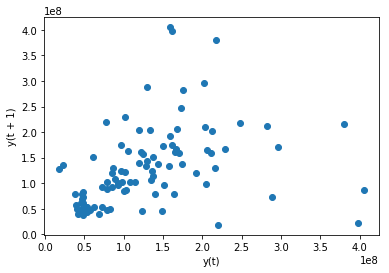

In [36]:
from pandas.plotting import lag_plot
lag_plot(df['volume'].head(100))

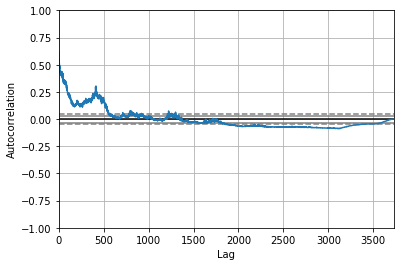

In [39]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['volume'])

In [5]:
df.sort_index(ascending=False)

,Unnamed: 0,first,high,low,close,value,volume
date,,,,,,,
2019-03-27,0,1200.0,1230.0,1155.0,1185.0,176335315273,148797731
2019-03-26,1,1165.0,1181.0,1155.0,1175.0,53776077278,45752698
2019-03-25,2,1104.0,1148.0,1090.0,1125.0,54284964909,48266909
2019-03-19,3,1098.0,1104.0,1088.0,1094.0,51346602848,46915467
2019-03-18,4,1087.0,1107.0,1080.0,1093.0,52023922956,47613958
2019-03-17,5,1065.0,1105.0,1065.0,1086.0,78396879094,72188704
2019-03-16,6,1070.0,1080.0,1058.0,1066.0,57287636127,53749117
2019-03-13,7,1060.0,1074.0,1055.0,1061.0,55718917819,52520158
2019-03-12,8,1054.0,1076.0,1051.0,1059.0,49538838809,46776193


In [6]:
dfx = df.head(7*30)
dfy = dfx.head(30)
dfx=dfx.tail(6*30)

In [26]:
dfx

,first,high,low,close,value,volume
date,,,,,,
2019-02-06,1082.0,1118.0,1063.0,1087.0,85362349684,78539570
2019-02-05,1095.0,1098.0,1069.0,1078.0,50975075112,47303012
2019-02-04,1090.0,1110.0,1076.0,1092.0,86521199173,79249110
2019-02-03,1090.0,1115.0,1056.0,1074.0,96046513643,89428273
2019-02-02,1137.0,1139.0,1081.0,1098.0,118676719982,108119818
2019-01-30,1159.0,1169.0,1121.0,1137.0,116430787978,102418235
2019-01-28,1140.0,1175.0,1120.0,1150.0,98488487885,85609904
2019-01-27,1113.0,1174.0,1112.0,1139.0,136281310788,119688870
2019-01-26,1180.0,1183.0,1122.0,1132.0,158597895702,140109782


In [27]:
dfy

,first,high,low,close,value,volume
date,,,,,,
2019-03-27,1200.0,1230.0,1155.0,1185.0,176335315273,148797731
2019-03-26,1165.0,1181.0,1155.0,1175.0,53776077278,45752698
2019-03-25,1104.0,1148.0,1090.0,1125.0,54284964909,48266909
2019-03-19,1098.0,1104.0,1088.0,1094.0,51346602848,46915467
2019-03-18,1087.0,1107.0,1080.0,1093.0,52023922956,47613958
2019-03-17,1065.0,1105.0,1065.0,1086.0,78396879094,72188704
2019-03-16,1070.0,1080.0,1058.0,1066.0,57287636127,53749117
2019-03-13,1060.0,1074.0,1055.0,1061.0,55718917819,52520158
2019-03-12,1054.0,1076.0,1051.0,1059.0,49538838809,46776193


In [8]:
# ---- Approach
from sklearn.linear_model import LinearRegression
y = dfx['close'].values
x = dfx.drop(['close'] , axis = 1).values
reg = LinearRegression().fit(x, y)
reg.coef_

array([ 3.48888648e-02, -2.37355448e-01,  5.57415616e-01,  6.78631575e-01,
       -8.10460032e-12,  5.69615125e-08])

In [41]:
def accuracy(yhat,y):
    ec=0
    dif = np.abs(yhat-y)
    

TypeError: 'numpy.ndarray' object is not callable

In [57]:
WINDOW=10
dfX=dfx.drop(['close'] , axis = 1)
x=dfX.iloc[0:WINDOW].values.flatten()
y=np.array([dfx.iloc[WINDOW]['close']])
print(x)
for i in range(1,len(dfX)-WINDOW):
    x=np.vstack([x,dfX.iloc[i:i+WINDOW].values.flatten()])
    y=np.concatenate([y,[dfx.iloc[i+WINDOW]['close']]])
print("x is {} \n, shape is {}".format(x,x.shape))
print("y is {} \n shape is {}".format(y,y.shape))    
    

[3.00000000e+01 1.08200000e+03 1.11800000e+03 1.06300000e+03
 8.53623497e+10 7.85395700e+07 3.10000000e+01 1.09500000e+03
 1.09800000e+03 1.06900000e+03 5.09750751e+10 4.73030120e+07
 3.20000000e+01 1.09000000e+03 1.11000000e+03 1.07600000e+03
 8.65211992e+10 7.92491100e+07 3.30000000e+01 1.09000000e+03
 1.11500000e+03 1.05600000e+03 9.60465136e+10 8.94282730e+07
 3.40000000e+01 1.13700000e+03 1.13900000e+03 1.08100000e+03
 1.18676720e+11 1.08119818e+08 3.50000000e+01 1.15900000e+03
 1.16900000e+03 1.12100000e+03 1.16430788e+11 1.02418235e+08
 3.60000000e+01 1.14000000e+03 1.17500000e+03 1.12000000e+03
 9.84884879e+10 8.56099040e+07 3.70000000e+01 1.11300000e+03
 1.17400000e+03 1.11200000e+03 1.36281311e+11 1.19688870e+08
 3.80000000e+01 1.18000000e+03 1.18300000e+03 1.12200000e+03
 1.58597896e+11 1.40109782e+08 3.90000000e+01 1.19000000e+03
 1.21000000e+03 1.15500000e+03 9.20951243e+10 7.79639740e+07]
x is [[3.00000000e+01 1.08200000e+03 1.11800000e+03 ... 1.15500000e+03
  9.20951243e

In [58]:
# ---- Approach
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.coef_

array([-1.24177937e-02, -1.83270213e-01,  4.68068270e-02,  2.25295138e-01,
        6.33437860e-11, -5.59568823e-08, -1.24179044e-02, -6.92476965e-02,
       -1.45943340e-01,  3.61825675e-02,  1.54185212e-10, -1.67020872e-07,
       -1.24177937e-02, -3.50560986e-02, -8.99491664e-02,  2.66859874e-02,
       -2.00910677e-10,  2.39179087e-07, -1.24177937e-02,  1.74825864e-01,
        7.76078749e-02,  5.68412802e-02, -2.24201671e-10,  2.38047855e-07,
       -1.24177937e-02,  1.05024796e-01, -3.04607396e-01,  3.39802373e-02,
        2.02452555e-10, -2.09110941e-07, -1.24177937e-02,  3.00680791e-01,
       -2.15660016e-01,  6.95543964e-02, -3.22019078e-11,  7.10483284e-08,
       -1.24177937e-02,  1.33711646e-01, -1.15334704e-01, -3.61801111e-01,
        8.35452818e-11, -8.23070588e-08, -1.24177937e-02, -5.83808400e-02,
        8.09436767e-02,  2.05117701e-01, -8.35004843e-11,  5.45907399e-08,
       -1.24177937e-02, -6.08859939e-01,  2.15214127e-01,  6.47743746e-02,
        1.14852974e-10, -

In [60]:
WINDOW=10
dfY=dfy.drop(['close'] , axis = 1)
xtest=dfY.iloc[0:WINDOW].values.flatten()
ytest=np.array([dfy.iloc[WINDOW]['close']])
print(x)
for i in range(1,len(dfY)-WINDOW):
    xtest=np.vstack([xtest,dfY.iloc[i:i+WINDOW].values.flatten()])
    ytest=np.concatenate([ytest,[dfy.iloc[i+WINDOW]['close']]])
print("x is {} \n, shape is {}".format(xtest,xtest.shape))
print("y is {} \n shape is {}".format(ytest,ytest.shape)) 

[[3.00000000e+01 1.08200000e+03 1.11800000e+03 ... 1.15500000e+03
  9.20951243e+10 7.79639740e+07]
 [3.10000000e+01 1.09500000e+03 1.09800000e+03 ... 1.12100000e+03
  2.56250983e+11 2.19514827e+08]
 [3.20000000e+01 1.09000000e+03 1.11000000e+03 ... 1.18000000e+03
  2.14740282e+10 1.81983290e+07]
 ...
 [1.97000000e+02 7.59000000e+02 7.59000000e+02 ... 7.21000000e+02
  4.43004770e+10 5.96531570e+07]
 [1.98000000e+02 7.50000000e+02 7.67000000e+02 ... 7.33000000e+02
  3.78857497e+10 5.01627750e+07]
 [1.99000000e+02 8.02000000e+02 8.25000000e+02 ... 7.17000000e+02
  1.00981267e+10 1.39153770e+07]]
x is [[0.00000000e+00 1.20000000e+03 1.23000000e+03 ... 1.05100000e+03
  7.33367852e+10 6.89038470e+07]
 [1.00000000e+00 1.16500000e+03 1.18100000e+03 ... 1.06800000e+03
  4.28771771e+10 3.97398450e+07]
 [2.00000000e+00 1.10400000e+03 1.14800000e+03 ... 1.05600000e+03
  6.09331817e+10 5.65760340e+07]
 ...
 [1.70000000e+01 1.13500000e+03 1.14500000e+03 ... 1.06000000e+03
  5.22378564e+10 4.86359330

In [61]:
reg.score(x, y)

0.9937083197448454

In [62]:
reg.score(xtest,ytest)

0.06391095495565757

In [73]:
x.shape[0]

(170, 60)

In [75]:
y.shape

(170,)

<function matplotlib.pyplot.show>

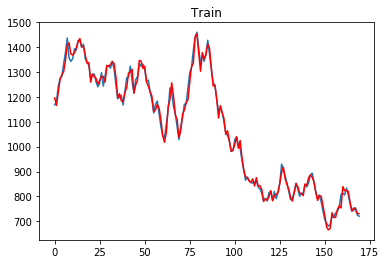

In [82]:
xaxis = [i for i in range(x.shape[0])]
plt.plot(xaxis,y)
plt.plot(xaxis , reg.predict(x),'r')
plt.title("Train")
plt.show

<function matplotlib.pyplot.show>

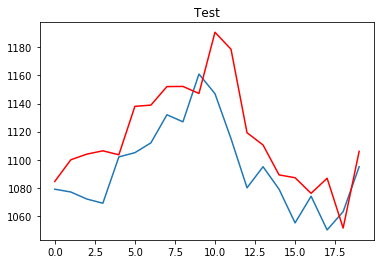

In [84]:
xaxis = [i for i in range(xtest.shape[0])]
plt.plot(xaxis,ytest)
plt.plot(xaxis , reg.predict(xtest),'r')
plt.title("Test")
plt.show